## Week 10 - Exercise 1 
### Fourier analysis of Atlanta temperature 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

### load data, extract time and March temperature for Atlanta

In [2]:
df=pd.read_excel('./ATL_MonMeanTemp_1879_2022.xlsx',skiprows=1)
df=df.replace('M', np.nan)

# year
yr=df.Year.values

# March temperature
TMP_ATL_Mar=df.iloc[:,3].values

xi=yr
yi=TMP_ATL_Mar

# if no missing values
x=xi
y=yi


# if there are missing values in the dataset, fill in the missing values first

# # # test
# # yi[18]=np.nan;
# # yi[45]=np.nan;
# ind=~np.isnan(yi)

# year=np.arange(1879,2023,1)
# x=year
# f = interpolate.interp1d(xi[ind], yi[ind])
# y = f(x)



In [79]:
np.shape(y)

(144,)

### make a simple plot of March temperature

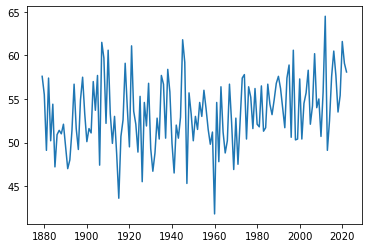

In [3]:
fig=plt.figure()
plt.plot(x,y)
plt.show()

In [4]:
N = np.size(x)     # number of data points
dT= 1.0             # data points are 1 year apart
T = (x[N-1]-x[0]+1)*dT  # the length of data record
T

144.0

### set up Fourier coefficients

In [5]:
# --------- set the number of coeffs to calculate 
K=np.ceil((N+1)/2).astype(int) # set K = N/2
print(K)
# --------
A=np.zeros((K,1))
B=np.zeros((K,1))
for n in range(0,K):
    cosn=np.cos(2*np.pi*n*x/T)   # cosine function of period T/n
    sinn=np.sin(2*np.pi*n*x/T)   # sine function of period T/n    
    A[n]=2/T*y.T@cosn*dT # take the inner product to get A
    B[n]=2/T*y.T@sinn*dT # take the inner product to get B

73


In [84]:
A[0]

array([106.81944444])

In [6]:
PSD=(A[1:K]**2+B[1:K]**2)/2
sum(PSD)
np.size(PSD)

72

In [120]:
np.var(y)

16.343238811728398

In [7]:
# frequency space
freq=np.arange(0,1/2+0.5/N,1/N)
np.size(freq)

73

Text(0.5, 1.0, 'periodogram of Atlanta Temperature')

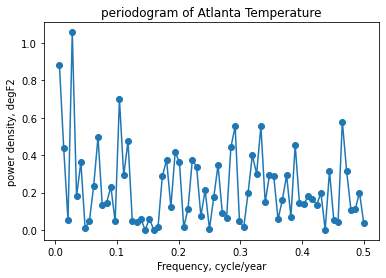

In [8]:
fig=plt.figure()
# calculate the power spectrum
freq0=freq[1:]; # discard the constant term (freq=0)

plt.plot(freq0,PSD,'o-')
plt.xlabel('Frequency, cycle/year')
plt.ylabel('power density, degF2');
plt.title('periodogram of Atlanta Temperature')

### assemble the Fourier series

In [9]:
# x=year
yest=A[0]/2*np.ones((N))
for n in range(1,K):
    cosn=np.cos(2*np.pi*n*x/T)
    sinn=np.sin(2*np.pi*n*x/T)
    yest=yest+A[n]*cosn+B[n]*sinn

### plot the prediction from fourier series

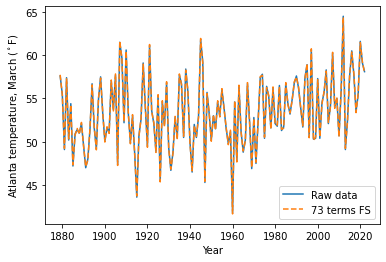

In [10]:
fig=plt.figure()
plt.plot(x,y,label='Raw data')
plt.plot(x,yest,'--',label=str(K)+' terms FS')

plt.xlabel('Year')
plt.ylabel('Atlanta temperature, March ($^\circ$F)')
plt.legend()

fn='Fig_ATL_temp_FS'
plt.savefig(fn+'.pdf',bbox_inches="tight")
plt.savefig(fn+'.png',bbox_inches="tight")

plt.show()

### plot the prediction using K<=10
smooth data using FT filter

In [110]:
# x=year
yest2=A[0]/2*np.ones((N))
for n in range(1,10):
    cosn=np.cos(2*np.pi*n*x/T)
    sinn=np.sin(2*np.pi*n*x/T)
    yest2=yest2+A[n]*cosn+B[n]*sinn

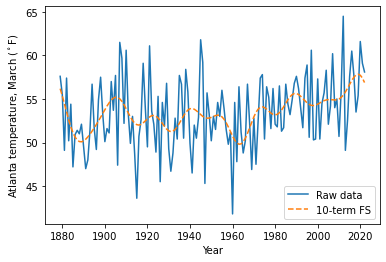

In [112]:
fig=plt.figure()
plt.plot(x,y,label='Raw data')
plt.plot(x,yest2,'--',label='10-term FS')

plt.xlabel('Year')
plt.ylabel('Atlanta temperature, March ($^\circ$F)')
plt.legend()

fn='Fig_ATL_temp_FS_10term'
plt.savefig(fn+'.pdf',bbox_inches="tight")
plt.savefig(fn+'.png',bbox_inches="tight")

plt.show()